<a href="https://colab.research.google.com/github/joyinning/python_practice_business_analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [ ]:
l = [pd.read_csv(filename) for filename in glob.glob("/content/*.csv")]
df = pd.concat(l, axis=0)
df.head()

,sale_time,purchaser_gender
0,2012-12-24 01:06:36,male
1,2012-12-24 01:24:41,female
2,2012-12-24 02:27:53,female
3,2012-12-24 02:36:06,male
4,2012-12-24 02:36:34,male


In [ ]:
df.shape

(204329, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204329 entries, 0 to 3461
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


**Plot daily sales for all 50 weeks.**

In [ ]:
sale_date = pd.to_datetime(df['sale_time'])

In [ ]:
daily_sales = df.groupby(sale_date.dt.date).size().reset_index(name='counts')
daily_sales.set_index('sale_time', inplace=True)
daily_sales

,counts
sale_time,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


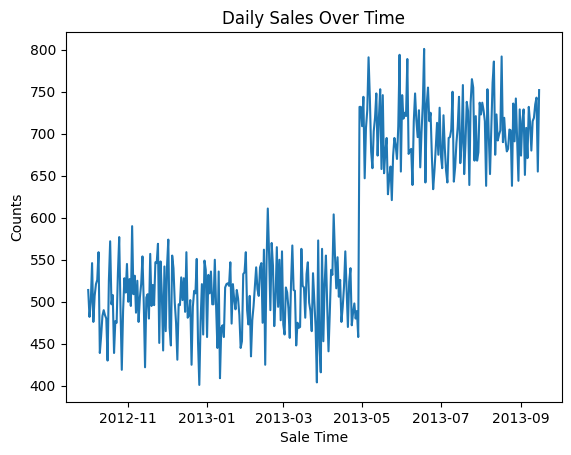

In [ ]:
daily_sales['counts'].plot(title="Daily Sales Over Time")
plt.xlabel('Sale Time')
plt.ylabel('Counts')

plt.show()

**It looks like there has been a sudden change in daily sales. What date did it occur?**

https://wikidocs.net/156786

In [ ]:
daily_sales['dod'] = daily_sales['counts'].diff().fillna(0)
daily_sales.head(5)

,counts,dod
sale_time,,
2012-10-01,514,0.0
2012-10-02,482,-32.0
2012-10-03,499,17.0
2012-10-04,546,47.0
2012-10-05,476,-70.0


https://wikidocs.net/154693

In [ ]:
daily_sales['dod'].idxmax()

datetime.date(2013, 4, 29)

In [ ]:
daily_sales.loc[daily_sales['dod'].idxmax()]

counts    732.0
dod       274.0
Name: 2013-04-29, dtype: float64

**Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?**

**Null (H0)**: The sample mean is equal to the population mean (732). <br>
**Alternative (H1)**: The sample mean is not equal to the population mean.

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_1samp(daily_sales['counts'], 732)

TtestResult(statistic=-26.367553024439697, pvalue=4.5681432390066193e-85, df=349)

The p-value is lower than 0.05. <br>
So the sample mean is equal to the population mean (732).